In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from itertools import product

taiwan_real_estate = pd.read_csv("../../data/taiwan_real_estate2.csv")
auctions = pd.read_csv("../../data/auctions.csv")
churn = pd.read_csv('../../data/churn.csv')

In [4]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn status vs. length of relationship, recency, and an interaction
mdl_churn_vs_both_inter = logit('has_churned~time_since_first_purchase*time_since_last_purchase', data=churn).fit()

# Print the coefficients
print(mdl_churn_vs_both_inter.params)

Optimization terminated successfully.
         Current function value: 0.649717
         Iterations 5
Intercept                                            -0.150534
time_since_first_purchase                            -0.637642
time_since_last_purchase                              0.423284
time_since_first_purchase:time_since_last_purchase    0.112250
dtype: float64


In [5]:
# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2, 4.1, 0.1)

# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1, 6.1, 0.1)

# Create p as all combinations of values of time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["time_since_first_purchase", "time_since_last_purchase"])

# Print the result
print(explanatory_data)

      time_since_first_purchase  time_since_last_purchase
0                          -2.0                      -1.0
1                          -2.0                      -0.9
2                          -2.0                      -0.8
3                          -2.0                      -0.7
4                          -2.0                      -0.6
...                         ...                       ...
4326                        4.0                       5.6
4327                        4.0                       5.7
4328                        4.0                       5.8
4329                        4.0                       5.9
4330                        4.0                       6.0

[4331 rows x 2 columns]


In [6]:
# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2, 4.1, 0.1)

# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1, 6.1, 0.1)

# Create p as all combinations of values of time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["time_since_first_purchase",
                                            "time_since_last_purchase"])

# Create prediction_data
prediction_data = explanatory_data.assign(has_churned=mdl_churn_vs_both_inter.predict(explanatory_data))

# Create most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# See the result
print(prediction_data)

      time_since_first_purchase  time_since_last_purchase  has_churned  \
0                          -2.0                      -1.0     0.716256   
1                          -2.0                      -0.9     0.720279   
2                          -2.0                      -0.8     0.724266   
3                          -2.0                      -0.7     0.728218   
4                          -2.0                      -0.6     0.732134   
...                         ...                       ...          ...   
4326                        4.0                       5.6     0.898775   
4327                        4.0                       5.7     0.906440   
4328                        4.0                       5.8     0.913580   
4329                        4.0                       5.9     0.920223   
4330                        4.0                       6.0     0.926396   

      most_likely_outcome  
0                     1.0  
1                     1.0  
2                     1.0  

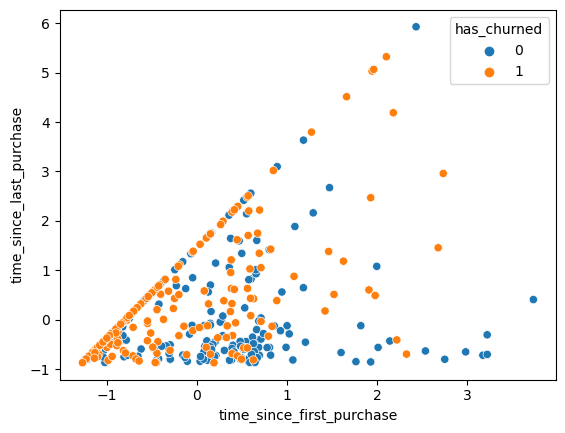

In [7]:
# Using churn, plot recency vs. length of relationship, colored by churn status
sns.scatterplot(x='time_since_first_purchase', 
                y='time_since_last_purchase',
                data=churn,
                hue='has_churned')

# Show the plot
plt.show()

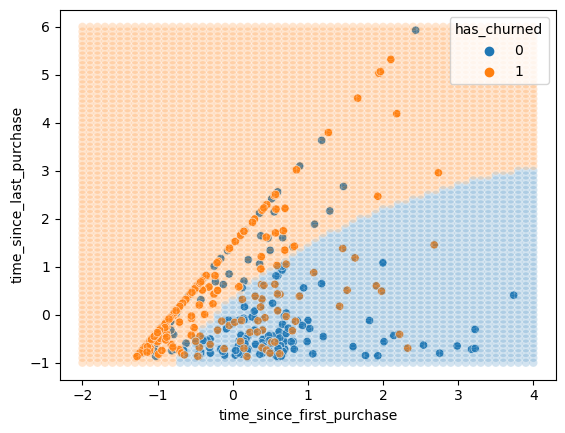

In [8]:
# Using churn, plot recency vs. length of relationship, colored by churn status
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=churn, 
                hue="has_churned")

# Using prediction_data, plot recency vs. length of relationship, colored by most_likely_outcome
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase", 
                data=prediction_data,
                hue='most_likely_outcome',
                alpha=0.2,
                legend=False)
                
# Show the plot
plt.show()

In [9]:
# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()

# Print it
print(conf_matrix)

[[102.  98.]
 [ 53. 147.]]


In [10]:
# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()

# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0, 0]
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("accuracy", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity", specificity)

accuracy 0.6225
sensitivity 0.735
specificity 0.51


## Logistic regression is a simple and more efficient method for binary and linear classification problems. It is a classification model, which is very easy to realize and achieves very good performance with linearly separable classes. It is an extensively employed algorithm for classification in industry.

In [11]:
# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, 0.1)

In [12]:
# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, 0.1)

# Create logistic_dist
logistic_dist = pd.DataFrame({"x": x,
                              "log_cdf": logistic.cdf(x),
                              "log_cdf_man": (1 / (1 + np.exp(-x)))})

# Check that each logistic function gives the same results
print(np.array_equal(logistic_dist["log_cdf_man"], logistic_dist["log_cdf_man"]))

True


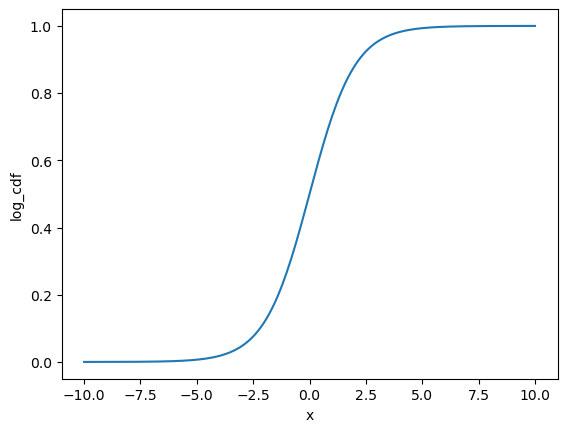

In [13]:
# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, 0.1)

# Create logistic_dist
logistic_dist = pd.DataFrame({"x": x,
                              "log_cdf": logistic.cdf(x),
                              "log_cdf_man": 1 / (1 + np.exp(-x))})

# Using logistic_dist, plot log_cdf vs. x
sns.lineplot(x="x",             
             y="log_cdf",             
             data=logistic_dist)

# Show the plot
plt.show()

In [14]:
# Create p ranging from 0.001 to 0.999 in steps of 0.001
p = np.arange(0.001, 1.0, 0.001)

In [15]:
# Create p ranging from 0.001 to 0.999 in steps of 0.001
p = np.arange(0.001, 1, 0.001)

# Create logistic_dist_inv
logistic_dist_inv = pd.DataFrame({"p": p,
                                  "logit": logistic.ppf(p),
                                  "logit_man": np.log(p / (1 - p))})

# Check that each logistic function gives the same results
print(np.array_equal(logistic_dist_inv["logit"], logistic_dist_inv["logit_man"]))

True


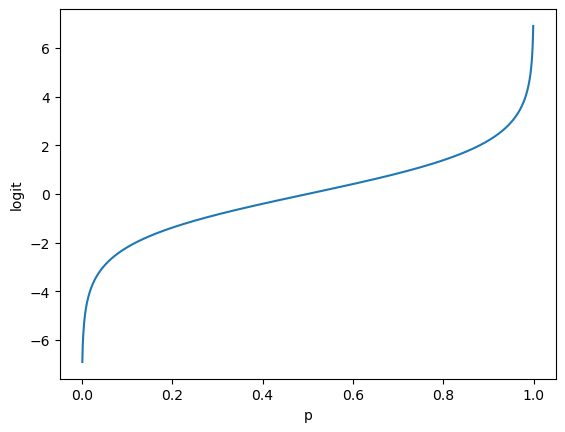

In [16]:
# Create p ranging from 0.001 to 0.999 in steps of 0.001
p = np.arange(0.001, 1, 0.001)

# Create logistic_dist_inv
logistic_dist_inv = pd.DataFrame({"p": p,
                                  "logit": logistic.ppf(p),
                                  "logit_man": np.log(p / (1 - p))})

# Using logistic_dist_inv, plot logit vs. p
sns.lineplot(x="p",             
             y="logit",             
             data=logistic_dist_inv)

# Show the plot
plt.show()

In [21]:
from scipy.optimize import minimize

x_actual = churn["time_since_last_purchase"]
y_actual = churn["has_churned"]

In [22]:
# Complete the function
def calc_neg_log_likelihood(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = logistic.cdf(intercept + slope * x_actual)
    # Calculate log-likelihood
    log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)
    # Calculate negative sum of log_likelihood
    neg_sum_ll = -np.sum(log_likelihood)
    # Return negative sum of log_likelihood
    return neg_sum_ll

# Test the function with intercept 10 and slope 1
print(calc_neg_log_likelihood([10, 1]))

1997.9624945172732


In [23]:
# Complete the function
def calc_neg_log_likelihood(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = logistic.cdf(intercept + slope * x_actual)
    # Calculate log-likelihood
    log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)
    # Calculate negative sum of log_likelihood
    neg_sum_ll = -np.sum(log_likelihood)
    # Return negative sum of log_likelihood
    return neg_sum_ll
  
# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_neg_log_likelihood,
               x0=[0,0]))

# Compare the output with the logit() call.
print(logit("has_churned ~ time_since_last_purchase", data=churn).fit().params)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 273.2001452736106
        x: [-3.502e-02  2.692e-01]
      nit: 5
      jac: [-7.629e-06 -3.815e-06]
 hess_inv: [[ 1.018e-02 -9.888e-04]
            [-9.888e-04  9.629e-03]]
     nfev: 24
     njev: 8
Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64
